In [0]:
%pip install bokeh

Python interpreter will be restarted.
Python interpreter will be restarted.


<h1> RDD IMPLENENTATION</h1>

<h2> Import datasets</h2>

In [0]:
fileroot = "clinicaltrial_2021.csv"
import os
os.environ['fileroot'] = fileroot
dbutils.fs.cp("/FileStore/tables/"+ fileroot + ".gz", "file:/tmp/", True)

Out[1]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5306075, modificationTime=1645020923000),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8400826, modificationTime=1645006640000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial/', name='clinicaltrial/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1648646425000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv.gz', name='clinicaltrial_2020.csv.gz', size=10981608, modificationTime=1649333689000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020_csv.gz', name='clinicaltrial_2020_csv.gz', size=10981608, modificationTime=1648646519000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1651062807000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltri

In [0]:
%sh
gunzip -d /tmp/ /tmp/$fileroot.gz

gzip: /tmp/ is a directory -- ignored


In [0]:
dbutils.fs.cp ("file:/tmp/" + fileroot , "/FileStore/tables/" + fileroot, True)
dbutils.fs.head("/FileStore/"+ fileroot,500)

[Truncated to first 500 bytes]
Out[4]: 'Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observati'

In [0]:
# Create an RDD
my_rdd = sc.textFile("/FileStore/tables/"+ fileroot)
header = my_rdd.first() 
clinical_rdd = my_rdd.filter(lambda x: x != header)
clinical_rdd.take(5)

Out[5]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|']

In [0]:
fileroot_ = "mesh"
os.environ['fileroot_'] = fileroot
dbutils.fs.head("/FileStore/tables/"+ fileroot_+ ".csv",500)

[Truncated to first 500 bytes]
Out[6]: 'term,tree\r\nCalcimycin,D03.633.100.221.173\r\nA-23187,D03.633.100.221.173\r\nTemefos,D02.705.400.625.800\r\nTemefos,D02.705.539.345.800\r\nTemefos,D02.886.300.692.800\r\nAbate,D02.705.400.625.800\r\nAbate,D02.705.539.345.800\r\nAbate,D02.886.300.692.800\r\nDifos,D02.705.400.625.800\r\nDifos,D02.705.539.345.800\r\nDifos,D02.886.300.692.800\r\nAbattoirs,J01.576.423.200.700.100\r\nAbattoirs,J03.540.020\r\nAbbreviations as Topic,L01.559.598.400.556.131\r\nAcronyms as Topic,L01.559.598.400.556.131\r\nAbdomen,A01.923.047\r\n"Abdomen,'

In [0]:
data = "/FileStore/"+ fileroot_ + ".csv"
# Create an RDD
mesh_rdd = sc.textFile(data)
mesh_rdd.take(5)

Out[7]: ['term,tree',
 'Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800']

In [0]:
fileroot_ = "pharma"
os.environ['fileroot_'] = fileroot_
dbutils.fs.head("/FileStore/tables/"+ fileroot_+ ".csv",500) 

[Truncated to first 500 bytes]
Out[8]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Paren'

In [0]:
# Create an RDD
data = "/FileStore/tables/"+ fileroot_ + ".csv"
pharma_rdd = spark.read.options(header=True, delimiter=',').csv(data).rdd
pharma_rdd.take(5)

Out[9]: [Row(Company='Abbott Laboratories', Parent_Company='Abbott Laboratories', Penalty_Amount='$5,475,000', Subtraction_From_Penalty='$0', Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting='$5,475,000', Penalty_Year='2013', Penalty_Date='20131227', Offense_Group='government-contracting-related offenses', Primary_Offense='False Claims Act and related', Secondary_Offense='kickbacks and bribery', Description="Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.", Level_of_Government='federal', Action_Type='agency action', Agency='Justice Department Civil Division', Civil/Criminal='civil', Prosecution_Agreement=None, Court=None, Case_ID=None, Private_Litigation_Case_Title=None, Lawsuit_Resolution=None, Facility_State=None, City=None, Address=None, Zip=None, NAICS_Code=None, NAICS_Translation=None, HQ_Country_of_Par

<h2> Question 1</h2>
<h3> The number of studies in the dataset. </h3>

In [0]:
clinical_rdd.distinct().count()

Out[10]: 387261

<h2> Question 2</h2>
<h3> The types of studies in the dataset and count of each type. </h3>

In [0]:
type_rdd = clinical_rdd.map(lambda x: x.split("|"))\
            .map(lambda x: x[5]).filter(lambda x: x != "Type")\
            .map(lambda y: (y,1)).reduceByKey(lambda a,b: a+b)\
            .sortBy(keyfunc=lambda x: x[1], ascending=False)
        
        
type_rdd.take(5)

Out[11]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

<h2> Question 3</h2>
<h3> The top 5 conditions with their frequency. </h3>

In [0]:
cond_rdd = clinical_rdd.map(lambda x: x.split("|"))\
            .map(lambda x: x[7]).filter(lambda x: len(x)>0)\
            .flatMap(lambda x: x.split(",")).map(lambda y: (y.strip(),1))\
            .reduceByKey(lambda a,b: a+b).sortBy(keyfunc=lambda x: x[1], ascending=False)

cond_rdd.take(5)

Out[12]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

<h2> Question 4</h2>
<h3> The most frequent roots. </h3>

In [0]:
header = mesh_rdd.first() 
split_mesh_rdd = mesh_rdd.filter(lambda x: x != header).map(lambda x: x.split(","))
split_mesh_rdd.take(5)

Out[13]: [['Calcimycin', 'D03.633.100.221.173'],
 ['A-23187', 'D03.633.100.221.173'],
 ['Temefos', 'D02.705.400.625.800'],
 ['Temefos', 'D02.705.539.345.800'],
 ['Temefos', 'D02.886.300.692.800']]

In [0]:
joint_rdd = cond_rdd.join(split_mesh_rdd).map(lambda x: x[1])\
            .map(lambda x: ((x[1].split(".")[0]), x[0]))\
            .reduceByKey(lambda w1,w2: w1+w2)\
            .sortBy(keyfunc=lambda x: x[1], ascending=False)

joint_rdd.take(5)

Out[14]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

<h2> Question 5</h2>
<h3> The 10 most common sponsors that are not pharmaceutical companies. </h3>

In [0]:
pharm_map = pharma_rdd.map(lambda x: x.Parent_Company).map(lambda y: (y,1))

pharm_map.take(5)

Out[15]: [('Abbott Laboratories', 1),
 ('AbbVie', 1),
 ('AbbVie', 1),
 ('Abbott Laboratories', 1),
 ('Johnson & Johnson', 1)]

In [0]:
sponsor_split = clinical_rdd.map(lambda x: x.split("|"))\
                .map(lambda x: x[1]).filter(lambda x: x != "Sponsor")\
                .map(lambda y: (y,1))
     
sponsor_split.take(5)

Out[16]: [('The University of Hong Kong', 1),
 ('Duke University', 1),
 ('Universidade Federal do Rio de Janeiro', 1),
 ('Istanbul Medeniyet University', 1),
 ('University of Roma La Sapienza', 1)]

In [0]:
new_join = sponsor_split.leftOuterJoin(pharm_map)\
            .filter(lambda x: x[1][1] == None)\
            .map(lambda x: (x[0],(x[1][0])))\
            .reduceByKey(lambda w1,w2: w1+w2)\
            .sortBy(keyfunc=lambda x: x[1], ascending=False)

new_join.take(10)

Out[17]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

<h2> Question 6</h2>
<h3> The number of completed studies each month in a given year. </h3>

In [0]:
year = fileroot[14:18]
studies_rdd = clinical_rdd.map(lambda x: x.split("|"))\
                .filter(lambda x:(year in x[4]))\
                .filter(lambda x: x[2]== "Completed")\
                .map(lambda x: ( x[4]))\
                .map(lambda y: (y,1))\
                .reduceByKey(lambda a,b: a+b)\
                .map(lambda x: (x[0].split(" ")[0], x[1]))
studies_rdd.collect()

Out[18]: [('Jan', 1131),
 ('Jun', 1094),
 ('Aug', 700),
 ('Apr', 967),
 ('Mar', 1227),
 ('May', 984),
 ('Feb', 934),
 ('Jul', 819),
 ('Oct', 187),
 ('Sep', 528)]

In [0]:
st_rdd = dict(studies_rdd.collect())
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
sort_list = []
for m in months:
    st = (m, st_rdd[m])
    sort_list.append(st)  
print(sort_list)

[('Jan', 1131), ('Feb', 934), ('Mar', 1227), ('Apr', 967), ('May', 984), ('Jun', 1094), ('Jul', 819), ('Aug', 700), ('Sep', 528), ('Oct', 187)]


In [0]:
list_rdd = spark.sparkContext.parallelize(sort_list)

In [0]:
month_df = spark.createDataFrame(list_rdd)

In [0]:
studies_df = month_df.withColumnRenamed("_1","Month")\
             .withColumnRenamed("_2","count")
studies_df.show()

+-----+-----+
|Month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



Out[23]: <AxesSubplot:xlabel='Month', ylabel='count'>

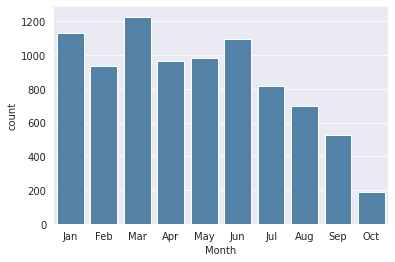

In [0]:
import seaborn as sns
sns.set_style('darkgrid')
sns.barplot(data=studies_df.toPandas(), x="Month", y="count",color='steelblue', order = months )

In [0]:
pharma_rdd.take(5)

Out[26]: [Row(Company='Abbott Laboratories', Parent_Company='Abbott Laboratories', Penalty_Amount='$5,475,000', Subtraction_From_Penalty='$0', Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting='$5,475,000', Penalty_Year='2013', Penalty_Date='20131227', Offense_Group='government-contracting-related offenses', Primary_Offense='False Claims Act and related', Secondary_Offense='kickbacks and bribery', Description="Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.", Level_of_Government='federal', Action_Type='agency action', Agency='Justice Department Civil Division', Civil/Criminal='civil', Prosecution_Agreement=None, Court=None, Case_ID=None, Private_Litigation_Case_Title=None, Lawsuit_Resolution=None, Facility_State=None, City=None, Address=None, Zip=None, NAICS_Code=None, NAICS_Translation=None, HQ_Country_of_Pa

<h2> Further analysis</h2>
<h3> The number of offenses in a given year. </h3>

In [0]:
offense_rdd = pharma_rdd.filter(lambda x:(year in x[5])).map(lambda x: x.Offense_Group)\
              .map(lambda y: (y,1)).reduceByKey(lambda w1,w2: w1+w2)\
              .sortBy(keyfunc=lambda x: x[1], ascending=False)
offense_rdd.take(5)

Out[36]: [('healthcare-related offenses', 4),
 ('government-contracting-related offenses', 4),
 ('safety-related offenses', 2),
 ('environment-related offenses', 2),
 ('employment-related offenses', 1)]